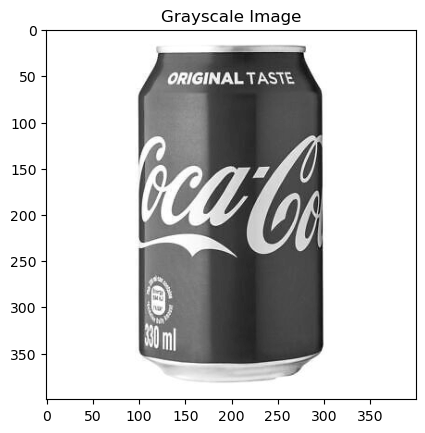

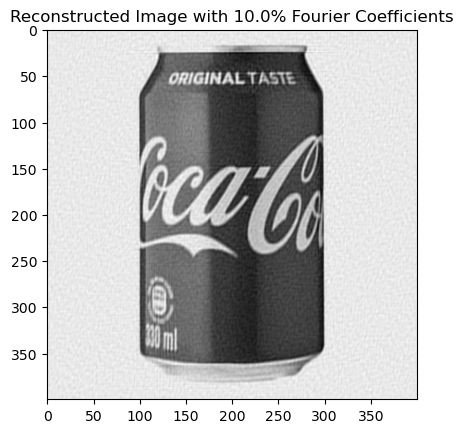

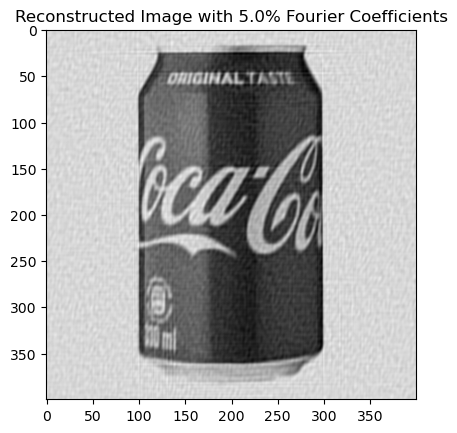

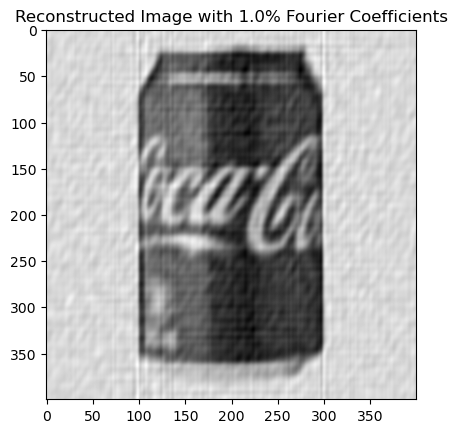

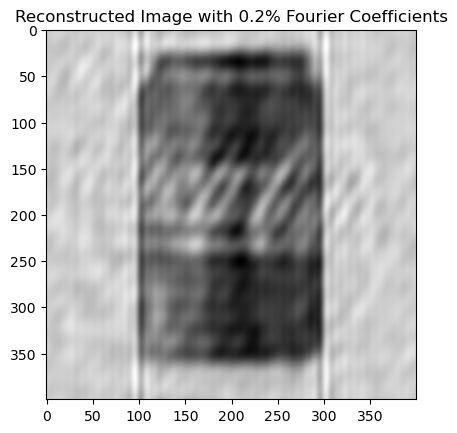

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image using PIL
img = Image.open("sample.jpg")

# Convert the image to a NumPy array
img = np.array(img)

# Convert the image to grayscale using weighted RGB conversion
img_bw = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])  # The weights are standard for converting RGB to grayscale

# Display the grayscale image
plt.imshow(img_bw, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Perform 2D Fourier Transform on the grayscale image
fhat = np.fft.fft2(img_bw)

# Sort the magnitudes of the Fourier coefficients
f_sort = np.sort(np.abs(fhat.reshape(-1)))

# Loop to keep different percentages of the Fourier coefficients
for keep in (0.1, 0.05, 0.01, 0.002):
    # Determine the threshold value for keeping a specific percentage of coefficients
    thresh = f_sort[int(np.floor((1 - keep) * len(f_sort)))]
    
    # Create a mask to retain coefficients above the threshold
    ind = np.abs(fhat) > thresh
    
    # Apply the mask to the Fourier-transformed image
    Atlow = fhat * ind
    
    # Perform inverse Fourier Transform to obtain the filtered image
    Alow = np.fft.ifft2(Atlow).real
    
    # Display the reconstructed image
    plt.figure()
    plt.imshow(Alow, cmap='gray')
    plt.title(f"Reconstructed Image with {keep*100}% Fourier Coefficients")
    plt.show()


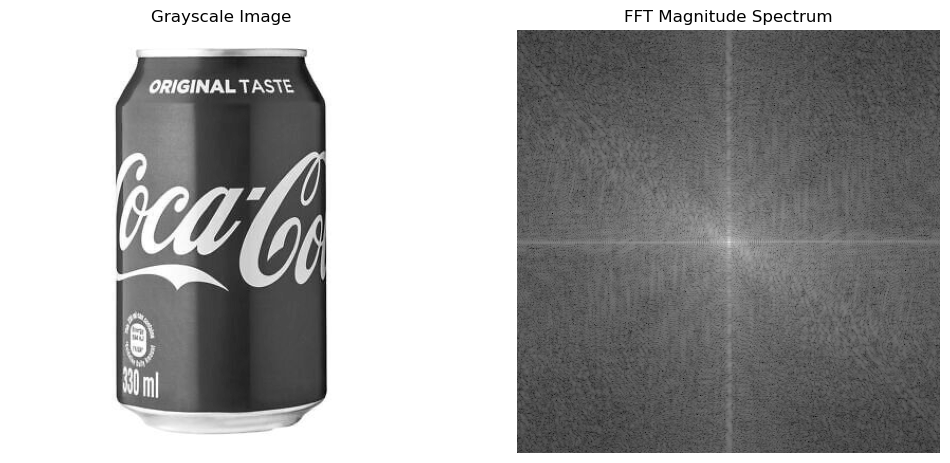

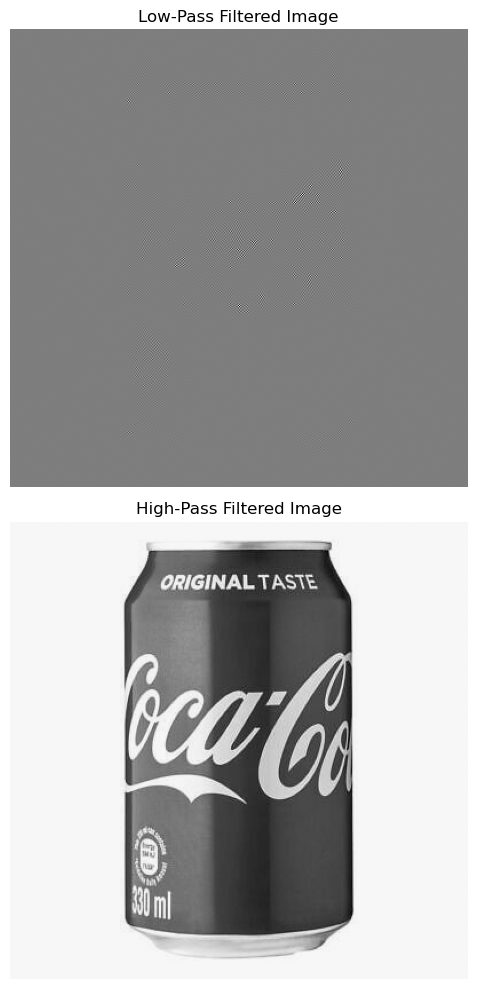

In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image using PIL
img = Image.open("sample.jpg")

# Convert the image to a NumPy array
img = np.array(img)

# Convert the image to grayscale
img_bw = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])  # The weights are standard for converting RGB to grayscale

# Display the grayscale image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_bw, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Perform 2D Fourier Transform on the grayscale image
fhat = np.fft.fft2(img_bw)
fhat_shifted = np.fft.fftshift(fhat)  # Shift zero frequency component to the center
f_magnitude = np.log(np.abs(fhat_shifted) + 1)  # Magnitude spectrum for visualization

# Display the FFT of the image
plt.subplot(1, 2, 2)
plt.imshow(f_magnitude, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis('off')
plt.show()

# Function to apply filters
def apply_filter(fhat, filter_type, cutoff_low=None, cutoff_high=None):
    # Create a grid of frequencies
    rows, cols = fhat.shape
    crow, ccol = rows // 2, cols // 2  # Center of the frequency domain
    y, x = np.ogrid[-crow:rows-crow, -ccol:cols-ccol]  # Create meshgrid of coordinates
    radius = np.sqrt(x**2 + y**2)  # Compute radius from the center
    
    if filter_type == 'low-pass':
        # Low-pass filter
        mask = radius <= cutoff_low
    elif filter_type == 'high-pass':
        # High-pass filter
        mask = radius >= cutoff_high
    elif filter_type == 'band-pass':
        # Band-pass filter
        mask = (radius >= cutoff_low) & (radius <= cutoff_high)
    else:
        raise ValueError("Unknown filter type. Use 'low-pass', 'high-pass', or 'band-pass'.")
    
    # Apply the mask to the Fourier transformed image
    filtered_fhat = fhat * mask
    return filtered_fhat

# Parameters for filtering
cutoff_low = 90  # Low cutoff frequency
cutoff_high = 90  # High cutoff frequency

# Apply filters
low_pass_fhat = apply_filter(fhat, 'low-pass', cutoff_low=cutoff_low)
high_pass_fhat = apply_filter(fhat, 'high-pass', cutoff_high=cutoff_high)

# Inverse Fourier Transform to obtain the filtered images
Alow = np.fft.ifft2(low_pass_fhat).real
Ahigh = np.fft.ifft2(high_pass_fhat).real
Aband = np.fft.ifft2(band_pass_fhat).real

# Display the filtered images
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.imshow(Alow, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(Ahigh, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis('off')


plt.tight_layout()
plt.show()
